# BP 神经网络

一个例子
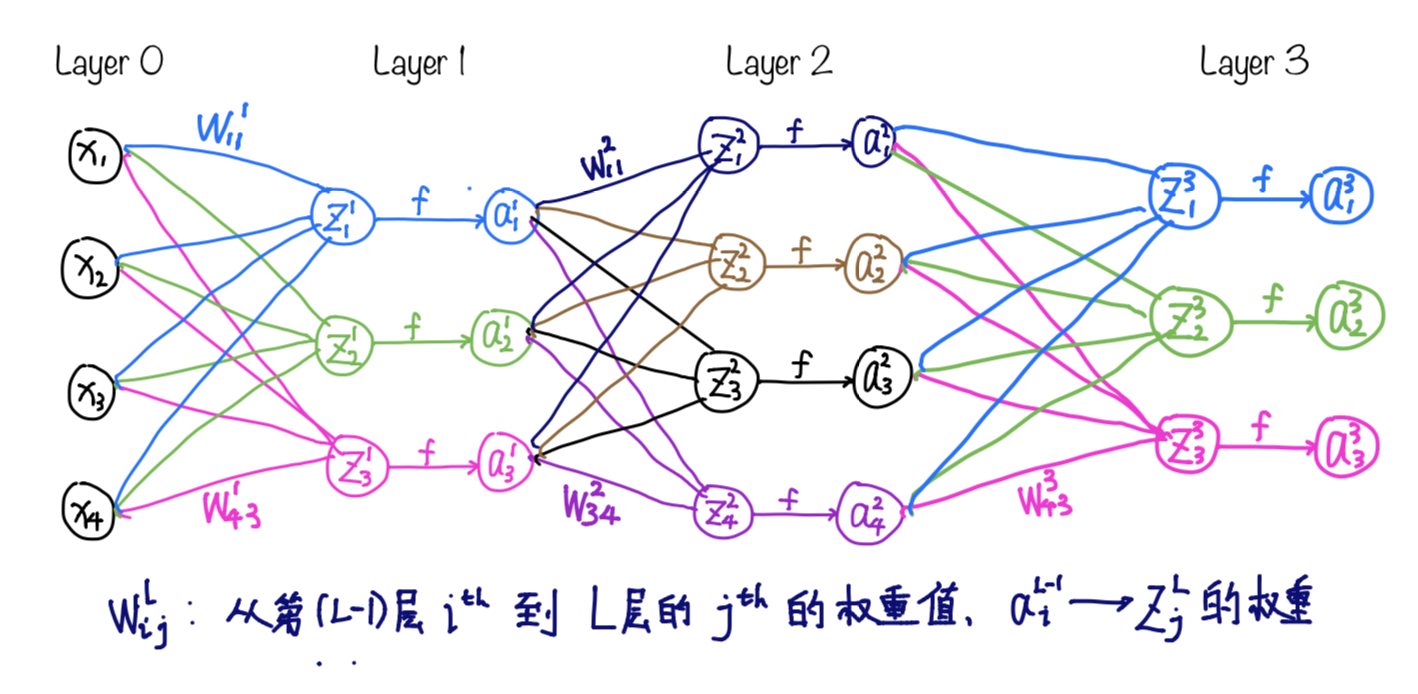

| 符号                | 维度                                                     | 描述                                                         |
| :------------------ | :------------------------------------------------------- | :----------------------------------------------------------- |
| $n$                 | $\mathbb{R}$                                             | 训练样本个数                                                 |
| $m$                 | $\mathbb{R}$                                             | 每个样本的特征个数                                           |
| $u$                 | $\mathbb{R}$                                             | 输出值个数                                                   |
| $x_{i,j}$           | $\mathbb{R}$                                             | 表示第$i^{th}$个输入样本的第$j^{th}$维特征的输入数据         |
| $x_{i}$             | $\mathbb{R}^{m \times 1}$                                | 表示第$i^{th}$个输入样本的所有m维特征向量                    |
| $X$                 | $\mathbb{R}^{m\times n}$                                 | 表示所有$n$个样本，每个样本有$m$个特征                       |
| $w_{s,t}^{(l)}$     | $\mathbb{R}$                                             | 表示从第$(l-1)^{th}$层的第$s^{th}$个神经元到第$l^{th}$层的$t^{th}$个神经元的权重； |
| $\left | l\right |$ | $\mathbb{R}$                                             | 表示第$l^{th}$层神经元个数；                                 |
| $W^{(l)}$           | $\mathbb{R}^{\left | l-1 \right |\times \left|l\right|}$ | 表示从第$(l-1)^{th}$层到$l^{th}$层映射的权重矩阵;            |
| $f$                 | $\mathbb{R} \rightarrow \mathbb{R}$                      | 激活函数                                                     |
| $z_{i,j}^{(l)}$     | $\mathbb{R}$                                             | 表示输入为第$i^{th}$个样本时，第$l^{th}$层的第$j^{th}$个神经元未激活的值，它是由第$(l-1)^{th}$层的输出经过$W^{(l)}$矩阵加权求和之后的结果。 $z_{i,j}^{(l)} = \sum_{k}^{\left|l-1\right|}a_{i,k}^{(l-1)} \cdot w_{k,j}^{(l)}$ |
| $z_{i}^{(l)}$       | $\mathbb{R}^{\left|l\right| \times 1}$                   | 表示输入为第$i^{th}$个样本时，第$l^{th}$层的$\left|l\right|$个神经元的未激活值组成的向量 |
| $Z^{(l)}$           | $\mathbb{R}^{\left|l\right|\times n}$                    | 表示$n$个样本全部输入时，第$l^{th}$层的n个样本，每个样本$\left|l\right|$个神经元未激活值组成的矩阵 |
| $a_{i,j}^{(l)}$     | $\mathbb{R}$                                             | 表示输入为第$i^{th}$个样本时，第$l^{th}$层的第$j^{th}$个神经元的输出，它是由$z_{i,j}^{(l)}$经过激活函数$f$映射而来 |
| $a_{i}^{(l)}$       | $\mathbb{R}^{\left|l\right| \times 1}$                   | 表示输入为第$i^{th}$个样本时，第$l^{th}$层的$\left|l\right|$个神经元的输出向量 |
| $A^{(l)}$           | $\mathbb{R}^{\left|l\right|\times n}$                    | 表示$n$个样本全部输入时，第$l^{th}$层的n个样本，每个样本$\left|l\right|$个神经元的输出组成的矩阵 |
| $\hat{y}_{i,j}$     | $\mathbb{R}$                                             | 表示输入为第$i^{th}$个样本时，输出层的第$j^{th}$个神经元的输出，也是整个模型的第$j^{th}$个的输出 |
| $\hat{y}_{i}$       | $\mathbb{R}^{u \times 1}$                                | 表述输入为第$i^{th}$个样本时，输出层的$u$个神经元的输出向量  |
| $\hat{Y}$           | $\mathbb{R}^{u \times n}$                                | 表示$n$个样本全部输入时，输出层的n个样本输出，每个样本$u$个输出组成的矩阵 |
| $y_{i,j}$           | $\mathbb{R}$                                             | 表示第$i^{th}$个输入样本的第$j^{th}$个实际输出值             |
| $y_i$               | $\mathbb{R}^{u \times 1}$                                | 表述第$i^{th}$个样本输出的$u$个实际输出向量                  |
| $Y$                 | $\mathbb{R}^{u \times n}$                                | 表示所有n个样本的的实际输出，每个样本$u$个实际输出组成的矩阵 |


### 常用公式



## 基本思想

正向传播时,输入样本从输入层传入,经各隐层逐层处理后,传向输出层。若输出层的实际输出与期望的输出(教师信号)不符,则转入误差的反向传播阶段。

反向传播时，将误差以某种形式通过隐层向输入层逐层反传,并将误差分摊给各层的所有单元,从而获得各层单元的误差信号,此误差信号即作为修正各单元权值的依据。

Q: 反向传播的是什么？

A: 误差，利用这些误差调整层之间的权重。

Q: 目的是什么？

A: 找到一组权重，使得整个神经网络模型的输出尽可能的接近实际值，也就是每次迭代误差越来越小。

Q: 怎么表示误差？

A: 有很多误差函数可以表示误差，取决你要用神经网络来做什么，如果是回归模型，常用的均方误差，如果是分类问题，常用的有对数损失，合页损失等。

## 损失函数和代价函数

本文针对单个样本的预测值与真实值之间的误差使用损失函数描述；对于全部n个样本的误差采用代价函数来描述。

常用的误差函数有均方误差，交叉熵损失，合页损失，对数损失等，不管具体用什么损失函数，我们定义我们的损失函数为$loss(\hat{y}_{i,j},y_{i,j})$，这里该函数可以是任何合理的损失函数，他的两个参数都为标量，它度量了预测值与实际值的差距。

第$i^{th}$个样本的损失函数：
$$
L(\hat{y}_i, y_i) =  \sum_{j=1}^u loss(\hat{y}_{i,j}, y_{i,j})
$$
代价函数为：
$$
C(\hat{Y}, Y) = \frac{1}{n} \sum_{i=1}^{n}L(\hat{y}_i, y_i) = \sum_{i=1}^n\left[ \sum_{j=1}^u loss(\hat{y}_{i,j}, y_{i,j}) \right]
$$




## 从一个例子开始

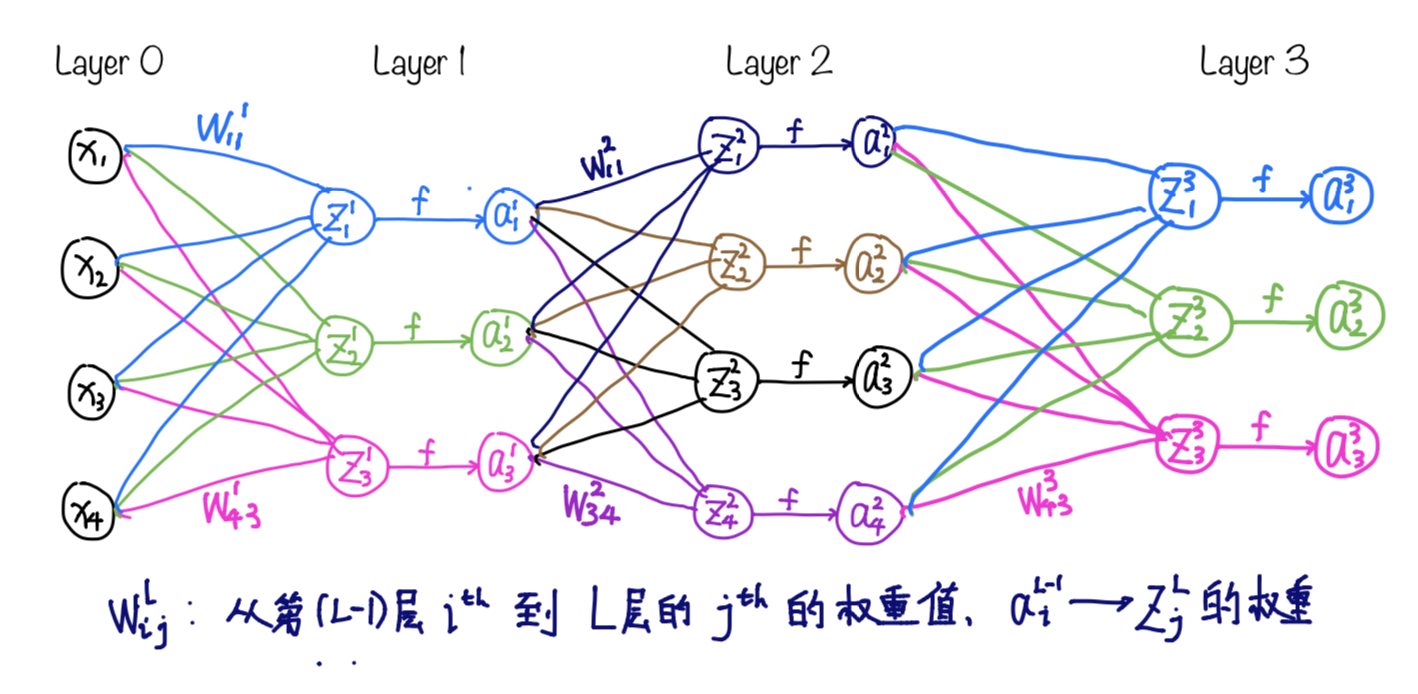



以上面的一个神经网络模型为例，剖析正向传播和反向传播的过程。



### 单样本情况

#### 正向传播

假设某个样本的输入向量和输出向量分别为：
$$
\vec{x} = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}

\vec{y} = \begin{bmatrix}
y_1 \\
y_2 \\
y_3
\end{bmatrix}
$$
神经网络结构如图，Layer 1神经元个数为3，Layer 2神经元个数为4，Layer 3 为输出层，有3个输出。

##### Layer 1

第一层权重矩阵维度为$4 \times 3$：
$$
W^{(1)} = \begin{bmatrix} 
w_{1,1}^{(1)}, w_{1,2}^{(1)}, w_{1,3}^{(1)} \\
w_{2,1}^{(1)}, w_{2,2}^{(1)}, w_{2,3}^{(1)} \\
w_{3,1}^{(1)}, w_{3,2}^{(1)}, w_{3,3}^{(1)} \\
w_{4,1}^{(1)}, w_{4,2}^{(1)}, w_{4,3}^{(1)}
\end{bmatrix}
$$

$$
z_1^{(1)} = w_{1,1}^{(1)}x_1 + w_{2,1}^{(1)}x_2 + w_{3,1}^{(1)}x_3 + w_{4,1}^{(1)}x_4 \\
z_2^{(1)} = w_{1,2}^{(1)}x_1 + w_{2,2}^{(1)}x_2 + w_{3,2}^{(1)}x_3 + w_{4,2}^{(1)}x_4 \\
z_3^{(1)} = w_{1,3}^{(1)}x_1 + w_{2,3}^{(1)}x_2 + w_{3,3}^{(1)}x_3 + w_{4,3}^{(1)}x_4
$$

表示成向量为：
$$
\vec{z}^{(1)} = \begin{bmatrix}
z_1^{(1)} \\
z_2^{(1)} \\
z_3^{(1)}
\end{bmatrix}
$$
使用向量形式计算得：
$$
\vec{z}^{(1)} = (W^{(1)})^T\vec{x}
$$
神经元激活之后的输出为：
$$
a_1^{(1)} = f(z_1^{(1)}) \\
a_2^{(1)} = f(z_2^{(1)}) \\
a_2^{(1)} = f(z_2^{(1)}) 
\\
\vec{a}^{(1)} = f(\vec{z}^{(1)})
$$

##### Layer 2

第二层权重矩阵维度为$3 \times 4$：
$$
W^{(2)} = \begin{bmatrix}
w_{1,1}^{(2)}, w_{1,2}^{(2)}, w_{1,3}^{(2)}, w_{1,4}^{(2)} \\
w_{2,1}^{(2)}, w_{2,2}^{(2)}, w_{2,3}^{(2)}, w_{2,4}^{(2)} \\
w_{3,1}^{(2)}, w_{3,2}^{(2)}, w_{3,3}^{(2)}, w_{3,4}^{(2)}
\end{bmatrix}
$$
第二层神经元为：
$$
z_1^{(2)} = w_{1,1}^{(2)}a_1^{(1)} + w_{2,1}^{(2)}a_2^{(1)} + w_{3,1}^{(2)}a_3^{(1)} \\
z_2^{(2)} = w_{1,2}^{(2)}a_1^{(1)} + w_{2,2}^{(2)}a_2^{(1)} + w_{3,2}^{(2)}a_3^{(1)} \\
z_3^{(2)} = w_{1,3}^{(2)}a_1^{(1)} + w_{2,3}^{(2)}a_2^{(1)} + w_{3,3}^{(2)}a_3^{(1)} \\
z_4^{(2)} = w_{1,4}^{(2)}a_1^{(1)} + w_{2,4}^{(2)}a_2^{(1)} + w_{3,4}^{(2)}a_3^{(1)}
$$
写成向量形式：
$$
\vec{z}^{(2)} = (W^{(2)})^T\vec{a}^{(1)}
$$
第二层神经元激活之后的输出为：
$$
\vec{a}^{(2)} = f(\vec{z}^{(2)})
$$

##### Layer 3

第三层权重矩阵维度为$4 \times 3$：
$$
W^{(3)} = \begin{bmatrix}
w_{1,1}^{(3)}, w_{1,2}^{(3)}, w_{1,3}^{(3)} \\
w_{2,1}^{(3)}, w_{2,2}^{(3)}, w_{2,3}^{(3)} \\
w_{3,1}^{(3)}, w_{3,2}^{(3)}, w_{3,3}^{(3)} \\
w_{4,1}^{(3)}, w_{4,2}^{(3)}, w_{4,3}^{(3)}
\end{bmatrix}
$$
第三层神经元为：
$$
z_1^{(3)} = w_{1,1}^{(3)}a^{(2)}_1 + w_{2,1}^{(3)}a^{(2)}_2 + w_{3,1}^{(3)}a^{(2)}_3 + w_{4,1}^{(3)}a^{(2)}_4 \\
z_2^{(3)} = w_{1,2}^{(3)}a^{(2)}_1 + w_{2,2}^{(3)}a^{(2)}_2 + w_{3,2}^{(3)}a^{(2)}_3 + w_{4,2}^{(3)}a^{(2)}_4 \\
z_3^{(3)} = w_{1,3}^{(3)}a^{(2)}_1 + w_{2,3}^{(3)}a^{(2)}_2 + w_{3,3}^{(3)}a^{(2)}_3 + w_{4,3}^{(3)}a^{(2)}_4
$$
写成向量形式：
$$
\vec{z}^{(3)} = (W^{(3)})^T\vec{a}^{(2)}
$$
第三层神经元激活之后的输出为：：
$$
\vec{a}^{(3)} = f(\vec{z}^{(3)})
$$
此为输出层，因此$\vec{a}^{(3)}$即为$\hat{y}$。

#### 反向传播

损失为：
$$
L(\hat{y}, y) =  \sum_{i=1}^3 loss(\hat{y}_{i}, y_{i}) \\
= loss(\hat{y_1}, y_1) + loss(\hat{y_2}, y_2) + loss(\hat{y_3}, y_3)
$$
第$l^{th}$层的误差向量记为$\delta^{(l)}$

##### Layer 3 输出层贡献的误差

$$
\frac{\partial L}{\partial z_1^{(3)}} = \frac{\partial loss(\hat{y_1}, y_1)}{\partial a_1^{(3)}} \cdot \frac{\partial a_1^{(3)}}{\partial z_1^{(3)}} \\
= \frac{\partial loss(\hat{y_1}, y_1)}{\partial a_1^{(3)}} \cdot f'(z_1^{(3)})
$$

上式中由于$loss(\hat{y_2}, y_2) + loss(\hat{y_3}, y_3)$与$z_1^{(3)}$无关，因此它们就是常数项，偏导结果为0，故可以省略。再由公式16得到的。

类似的可以得到。
$$
\frac{\partial L}{\partial z_2^{(3)}} = \frac{\partial loss(\hat{y_2}, y_2)}{\partial a_2^{(3)}} \cdot f'(z_2^{(3)}) \\
\frac{\partial L}{\partial z_3^{(3)}} = \frac{\partial loss(\hat{y_3}, y_3)}{\partial a_3^{(3)}} \cdot f'(z_3^{(3)})
$$


写成向量形式为：
$$
\delta^{(3)} =  \frac{\partial L}{\partial \vec{z}^{(3)}} = \frac{\partial L}{\partial \vec{a}^{(3)}} \odot f'(\vec{z}^{3})
$$
对应元素相乘。

##### Layer 3的权重矩阵贡献的误差

$w^{(3)}_{1,1}$对误差的贡献为：
$$
\frac{\partial L}{\partial w^{(3)}_{1,1}} = \frac{\partial L}{\partial z_1^{(3)}} \cdot \frac{\partial z_1^{(3)}}{\partial w_{1,1}^{(3)}} =  \frac{\partial L}{\partial z_1^{(3)}} \cdot a_1^{(2)}
$$
其中，第一项已经在上部分求出来了，由公式14可知，第二项的值其实就是$a_1^{(2)}$。

类似的有：
$$
\frac{\partial L}{\partial w^{(3)}_{1,2}} =  \frac{\partial L}{\partial z_2^{(3)}} \cdot a_1^{(2)} \\
\frac{\partial L}{\partial w^{(3)}_{2,1}} =  \frac{\partial L}{\partial z_1^{(3)}} \cdot a_2^{(2)} \\
\vdots \\
\frac{\partial L}{\partial w^{(3)}_{4,3}} =  \frac{\partial L}{\partial z_3^{(3)}} \cdot a_4^{(2)}
$$
不一一列出。写成矩阵形式：
$$
\frac{\partial L}{\partial W^{(3)}} =\vec{a}^{(2)}\left(\frac{\partial L}{\partial \vec{z}^{(3)}}\right)^T \\
= \vec{a}^{(2)}\left(\delta^{(3)}\right)^T
$$




##### Layer 2的输出误差

$a_{1}^{(2)}$对误差的贡献为：
$$
\frac{\partial L}{\partial a_1^{(2)}} = 
\frac{\partial L}{\partial z_1^{(3)}}\cdot\frac{\partial z_1^{(3)}}{\partial a_1^{(2)}} +
\frac{\partial L}{\partial z_2^{(3)}}\cdot\frac{\partial z_2^{(3)}}{\partial a_1^{(2)}} +
\frac{\partial L}{\partial z_3^{(3)}}\cdot\frac{\partial z_3^{(3)}}{\partial a_1^{(2)}} \\
= \frac{\partial L}{\partial z_1^{(3)}}w_{1,1}^{(3)} + 
\frac{\partial L}{\partial z_2^{(3)}}w_{1,2}^{(3)} +
\frac{\partial L}{\partial z_3^{(3)}}w_{1,3}^{(3)}
$$
$z_1^{(2)}$对误差的贡献：
$$
\frac{\partial L}{\partial z_1^{(2)}} = \frac{\partial L}{\partial a_1^{(2)}} \cdot \frac{\partial a_1^{(2)}}{\partial z_1^{(2)}}
$$
$\vec{a}^{(2)}$对误差的贡献写成向量形式：
$$
\frac{\partial L}{\partial \vec{a}^{(2)}} = W^{(3)}\frac{\partial L}{\partial \vec{z}^{(3)}} = W^{(3)}\delta^{(3)}
$$
$\vec{z}^{(2)}$对误差的贡献写成向量形式：
$$
\frac{\partial L}{\partial \vec{z}^{(2)}}= \frac{\partial L}{\partial \vec{a}^{(2)}} \odot f'(\vec{z}^{(2)})
$$
由上面两个公式得：
$$
\delta^{(2)} = \frac{\partial L}{\partial \vec{a}^{(2)}} \odot f'(\vec{z}^{(2)}) \\
= W^{(3)}\delta^{(3)} \odot f'(\vec{z}^{2})
$$


##### Layer 2的权重矩阵对误差的贡献

$w_{1,1}^{(2)}$对误差的贡献
$$
\frac{\partial L}{\partial w_{1,1}^{(2)}} = \frac{\partial L}{\partial z_1^{(2)}} \cdot \frac{\partial z_1^{(2)}}{\partial w_{1,1}^{(2)}} \\
= \frac{\partial L}{\partial z_1^{(2)}} \cdot a_1^{(1)}
$$
写成矩阵形式：
$$
\frac{\partial L}{\partial W^{(2)}} = \vec{a}^{(1)} \left(\frac{\partial L}{\partial \vec{z}^{2}}\right)^T \\
 = \vec{a}^{(1)}\left(\delta^{(2)}\right)^T
$$



##### Layer 1的输出误差

$a_{1}^{(1)}$对误差的贡献：
$$
\frac{\partial L}{\partial a_1^{(1)}} = 
\frac{\partial L}{\partial z_1^{(2)}}\frac{\partial z_1^{(2)}}{\partial a_1^{(1)}} +
\frac{\partial L}{\partial z_2^{(2)}}\frac{\partial z_2^{(2)}}{\partial a_1^{(1)}} +
\frac{\partial L}{\partial z_3^{(2)}}\frac{\partial z_3^{(2)}}{\partial a_1^{(1)}} +
\frac{\partial L}{\partial z_4^{(2)}}\frac{\partial z_4^{(2)}}{\partial a_1^{(1)}} \\
= \frac{\partial L}{\partial z_1^{(2)}}\cdot w_{1,1}^{(2)} +
\frac{\partial L}{\partial z_2^{(2)}}\cdot w_{1,2}^{(2)} +
\frac{\partial L}{\partial z_3^{(2)}}\cdot w_{1,3}^{(2)} +
\frac{\partial L}{\partial z_4^{(2)}}\cdot w_{1,4}^{(2)}
$$
$z_1^{(1)}$对误差的贡献为：
$$
\frac{\partial L}{\partial z_1^{(1)}} = \frac{\partial L}{\partial a_1^{(1)}} \cdot f'(z^{(1)}_1)
$$
写成向量形式：
$$
\frac{\partial L}{\partial \vec{a}^{(1)}} = W^{(2)}\frac{\partial L}{\partial \vec{z}^{2}} \\
= W^{(2)}\delta^{(2)}
$$

$$
\delta^{(1)} = \frac{\partial L}{\partial \vec{a}^{(1)}} \odot f'(\vec{z}^{(1)}) \\
= W^{(2)}\delta^{(2)}\odot f'(\vec{z}^{1})
$$

##### Layer 1的权重矩阵对误差的贡献

$w_{1,1}^{(1)}$对误差的贡献：
$$
\frac{\partial L}{\partial w_{1,1}^{(1)}} = \frac{\partial L}{\partial z_1^{(1)}}\cdot \frac{\partial z_1^{(1)}}{\partial w_{1,1}^{(1)}} = \frac{\partial L}{\partial z_1^{(1)}} \cdot x_1
$$
写成矩阵形式：
$$
\frac{\partial L}{\partial W^{(1)}} = \vec{x} \left(\frac{\partial L}{\partial \vec{z}^{(2)}}\right)^T = \vec{x} \left(\delta^{(2)}\right)^T
$$

#### 总结

单样本情况，正向传播过程，从$l$层到$l+1$层的过程为：
$$
z^{(l+1)} = \left(W^{(l+1)}\right)^Ta^{(l)} \\
a^{(l+1)} = f\left(z^{(l+1)}\right)
$$
最开始的$a^{(0)}$为样本输入向量。

反向传播过程，从$l+1$层神经元到$l$层神经元的过程为：
$$
\delta^{(l)} = W^{(l+1)}\delta^{(l+1)} \odot f'(\vec{z}^{(l)})
$$
最开始的输出层误差为：
$$
\delta^{(L)} = \frac{\partial L}{\partial \vec{a}^{(L)}} \odot f'(\vec{z}^{(L)})
$$
从$l$层神经元到$l$层的权重矩阵的过程为：
$$
\frac{\partial L}{\partial W^{(l)}} = \vec{a}^{(l-1)}\left(\delta^{(l)}\right)^T
$$



### 多样本情况

在处理多样本时，每层的神经元不再是向量，而是变成具有$n$列的矩阵，$n$为样本个数。

多样本情况的误差采用代价函数代替损失函数，其余过程类似

单样本情况，正向传播过程，从$l$层到$l+1$层的过程为：
$$
Z^{(l+1)} = \left(W^{(l+1)}\right)^TA^{(l)} \\
A^{(l+1)} = f\left(Z^{(l+1)}\right)
$$
最初的$A^{(0)}$为样本输入矩阵，维度为$m \times n$，$m$为特征向量的维度，$n$为样本数量。



反向传播过程，从$l+1$层神经元到$l$层神经元的过程为：
$$
\Delta^{(l)} = W^{(l+1)}\Delta^{(l+1)} \odot f'(Z^{(l)})
$$
最开始的输出层误差为：
$$
\Delta^{(L)} = \frac{\partial C}{\partial A^{(L)}} \odot f'(Z^{(L)})
$$
从$l$层神经元到$l$层的权重矩阵的过程为：
$$
\frac{\partial L}{\partial W^{(l)}} = A^{(l-1)}\left(\Delta^{(l)}\right)^T
$$

### 带偏置的
$$
Z^{(l+1)} = (W^{(l+1)})^TA^{(l)} + b^{(l+1)}
$$

$l+1$层神经元到$l$层神经元的误差传递
$$
\Delta^{(l)} =  W^{(l+1)}\Delta^{(l+1)} \odot f'(Z^{(l)})
$$

参数变化
从$l$层神经元到$l$层权重矩阵的过程
$$
\frac{\partial L}{\partial W^{(l)}} = A^{(l-1)}\left(\Delta^{(l)}\right)^T
$$

$$
\frac{\partial L}{\partial b^{(l)}} = \Delta^{(l)}
$$

### 损失
多分类问题采用交叉熵损失，交叉熵。
$$
H(y, \hat{y}) = \sum_{i=1}^uy_i*log\frac{1}{\hat{y}_i}
$$

n个样本的代价函数为:
$$
C(\theta)=\sum_{i=1}^n\sum_{j=1}^uy_j*log\frac{1}{\hat{y}_j}= -\sum_{i=1}^n\sum_{j=1}^uy_j*log\hat{y}_j
$$

当采用交叉熵作为损失函数时，最后一层的误差为
$$
\Delta^{(L)} = \frac{\partial C }{\partial Z^{(L)}} = - \frac{y}{\hat{y}} \odot f'(Z^{(L)})
$$

以上操作都为元素除。

In [73]:
# 导入常用包
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt

%matplotlib inline

class MyAnnImpl(object):
    """
    m: 输入向量特征数目
    n：样本数目
    X：输入矩阵 n*m
    y：输出类别向量 n*1
    weights: 权重矩阵 |L| X |L+1|
    biases：偏置
    nodes: [] 各层的神经元的值，内容为dict {"Z": Z, "A": A}
    num_layers: 层数
    """
    def __init__(self, sizes):
        """
        :param sizes: list类型，储存每层神经网络的神经元数目，
                           当size[0]为0时，表示输入层个数由输入数据的特征向量决定
                           当size[-1]为0时，表示输出层个数由目标数据决定
                           譬如说：sizes = [0, 3, 0] 表示隐藏层有3个神经元；输入层和输出层由数据决定
        """
        self.load_data()
        
        sizes[0] = self.m
        sizes[-1] = self.num_classes
        
        print(sizes)
        
        self.sizes = sizes
        self.num_layers = len(sizes)
        self.learning_rate = 50
    
        # 除去输入层，随机产生每层中 y 个神经元的 biase 值（0 - 1）
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        
        # 随机产生每条连接线的 weight 值（0 - 1）
        self.weights = [np.random.randn(x, y)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-1*x))
    
    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1-s)
    
    def relu(self, x):
        return np.array(x>0) * x
    
    def relu_derivative(self, x):
        dx = np.array(x, copy=True) 
        dx[x > 0] = 1
        dx[x <= 0] = 0
        return dx
        
    def dense_to_one_hot(self, labels_dense, num_classes):
        """Convert class labels from scalars to one-hot vectors."""
        labels_dense = labels_dense.astype(np.int16)
        num_labels = labels_dense.shape[0]
        one_hot_label = np.zeros(shape=(num_labels,num_classes))##生成全0矩阵
        one_hot_label[np.arange(0,num_labels),labels_dense] = 1##相应标签位置置1
        return one_hot_label

    def load_data(self):
        mnist = fetch_mldata("MNIST original", data_home="./datasets")
        self.X = mnist.data
        self.num_classes = np.unique(mnist.target).size
        self.y = self.dense_to_one_hot(mnist.target, self.num_classes)
        self.n, self.m = mnist.data.shape
        return mnist
    
    def compute_cost(self):
        """
        output: m*n
        """
        output = self.nodes[-1]['A']
        y = self.y
#         print(output.shape)
#         print(y.shape)
        cost = -1 * np.multiply(np.log(output), y.T)
        cost = cost.sum(axis=(0,1))
        return cost
        
    
    def feed_forward(self, X=None):
        """
        前向传输计算每个神经元的值
        :param A: 输入值
        :return: 计算后每个神经元的值
        """
        
        
        if X is None:
            X = self.X
        
        A = X.T
        self.nodes = []
        a_layer_node = {"Z": None, "A": A}
        self.nodes.append(a_layer_node)
        for b, W in zip(self.biases, self.weights):
            # 加权求和以及加上 biase
            Z = np.dot(W.T, A)+b
            A = self.sigmoid(Z)
            a_layer_node = {"Z": Z, "A": A}
            self.nodes.append(a_layer_node)
            
        A = self.softmax(A)
#         print(A[:, 0])
        return A, self.nodes
    
    def softmax(self, output):
        exp = np.exp(output)
        exp_sum = np.sum(exp, axis = 0, keepdims=True)
#         print("exp.shape ", exp.shape, "exp sum ", exp_sum.shape )
        return exp/exp_sum
    
    def backward(self):
        
        """
        weights: [(784, 3),   (3, 4),    (4, 10)]
        biases:   [(3, 1),       (4, 1),    (10, 1)]
        num_layers: 4
        nodes: [{"A": (784 * 70000)},     {"A",(3, 70000)},      {"A":(4, 70000)},         {"A":(10*70000)}]
        """
        
        AL = self.nodes[-1]["A"]
        ZL = self.nodes[-1]["Z"]
        y = self.y.T
        learning_rate = self.learning_rate
        n = self.n
        
        delta_L = -1 * np.divide(y, AL) * self.sigmoid_derivative(ZL)
        
        delta_l = delta_L
        for l in reversed(range(self.num_layers-1)):
            prevA = self.nodes[l]["A"]
            prevZ = self.nodes[l]["Z"]
            
            dW = 1/n * np.dot(prevA, delta_l.T)
            db = 1/n * np.sum(delta_l, axis=1, keepdims=True)
            
            W = self.weights[l]
            b = self.biases[l]
            if l != 0:
                delta_l = np.dot(W, delta_l) * self.sigmoid_derivative(prevZ)
            
            W = W - learning_rate * dW
            b = b - learning_rate * db
            self.weights[l] = W
            self.biases[l] = b
            
    
    def predict(self,X):
        output =  self.feed_forward(X)[0]
        print(output)
        labels = np.argmax(output, axis=0)
        return labels
            
sizes = [0,5,0]
my_ann = MyAnnImpl(sizes)

for i in range(100):
    my_ann.feed_forward()
    my_ann.backward()
    if i % 1 == 0:
        print(my_ann.compute_cost())

mnist = my_ann.load_data()

m = mnist.data.shape[0]

selected = np.random.randint(m, size=10)

labels = my_ann.predict(mnist.data[selected])
print("predict ", labels, "real ", mnist.target[selected])



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


[784, 5, 10]
57555.424278390834
2282.211271634302
1318.0907009200591
891.9820239768236
687.0630531242546
559.4906424136578
480.07478365960935
424.9917902605015
380.4825041210922
343.43849148386465
313.00543906851277
289.38176453504303
268.5820662950841
249.1617553180252
233.443201905854
219.86842088597132
207.00197517003488
194.39477245674658
183.83055411829278
174.4328240407562
165.68621510523158
158.50591760016388
150.39640494185116
143.904417545576
137.3026468920218
131.86008654639204
125.92409073160039
121.20000871298896
116.8468158399876
112.77641626704698
108.39199984024174
104.60973567572078
100.89440191269568
97.48755034307797
94.30731984319969
91.22559688171991
88.34474453496763
85.36102909483567
82.55401830506636
80.31870816718362
77.89667898871835
75.62050152260078
73.47414606578367
71.69273192011217
70.0078350834032
68.42831045670214
66.8974566047246
65.34444706402765
63.61600277832308
62.32942551504175
61.07721366472414
59.893219981753134
58.67845559331208
57.5006283304291

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=1)

X = mnist.data
y = mnist.target
mlp.fit(X, y)

output = mlp.predict(mnist.data[selected])
print("predict ", output, "real ", mnist.target[selected])


predict  [0. 9. 0. 1. 7. 7. 0. 0. 0. 0.] real  [8. 7. 8. 1. 9. 7. 0. 4. 8. 5.]


In [1]:
import numpy as np
 
label = np.array(np.arange(20))##标签数据，标签从0开始
print(label.shape)
classes = max(label) + 1 ##类别数为最大数加1
one_hot_label = np.zeros(shape=(label.shape[0],classes))##生成全0矩阵
one_hot_label[np.arange(0,label.shape[0]),label] = 1##相应标签位置置1
# print (one_hot_label)


a = np.array(np.arange(5))
b = np.array(np.arange(5))

a*b


(20,)


array([ 0,  1,  4,  9, 16])